In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
# drop columns with more than 50% missing values
df=df.drop(columns=['license','house_rules','reviews per month','last review'],axis=1)

In [4]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

In [5]:
# drop rows with missing values
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [7]:
df.shape

(99032, 22)

#### 💸💳Price Analysis🏷️¶

In [ ]:
#replace $ and , in price column
df['price']=df['price'].str.replace('$',"")
df['price']=df['price'].str.replace(",","")
df['price']=df['price'].str.replace(" ","")
df['price']=pd.to_numeric(df['price'])

In [9]:
#find out which neighborhoods are the most expensive and which are the most affordable.
df_price=df.groupby(by='neighbourhood')['price'].mean().sort_values(ascending=False).reset_index()
df_price.head(10)

,neighbourhood,price
0,New Dorp,1045.000000
1,"Chelsea, Staten Island",1042.000000
2,Fort Wadsworth,1024.000000
3,Little Neck,817.750000
4,Jamaica Hills,812.904762
5,Arden Heights,804.888889
6,Shore Acres,797.590909
7,Midland Beach,796.176471
8,East Morrisania,786.950000
9,Mill Basin,775.142857


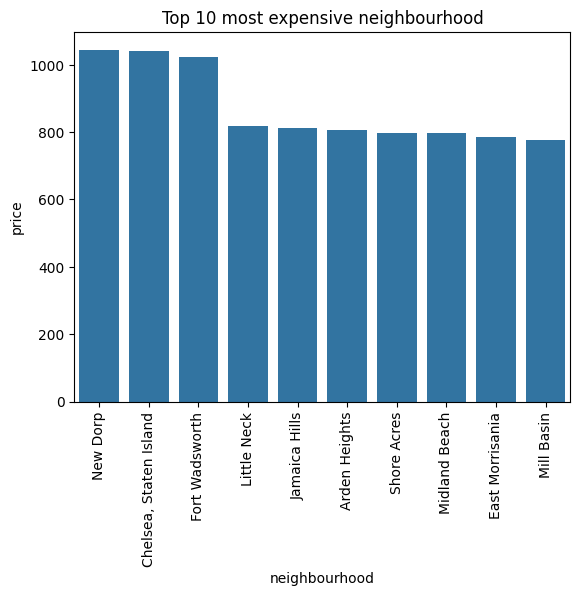

In [13]:
sns.barplot(x=df_price['neighbourhood'].head(10),y=df_price['price'].head(10))
plt.title("Top 10 most expensive neighbourhood")
plt.xticks(rotation=90)
plt.show()

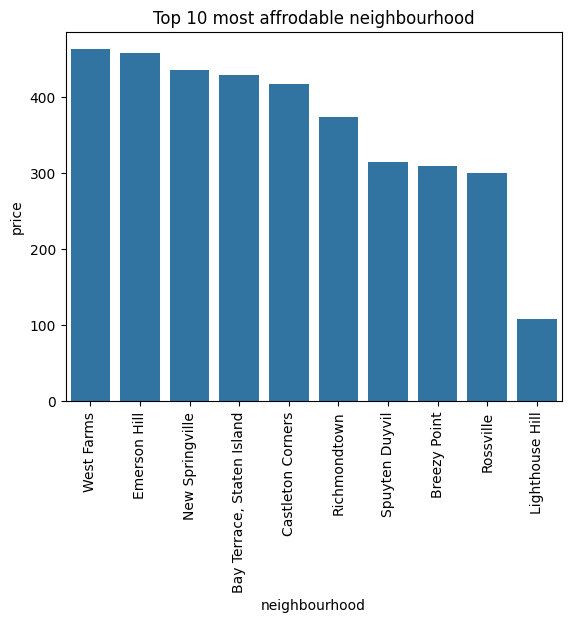

In [ ]:
# top 10 most affrodable neighbourhood
sns.barplot(x=df_price['neighbourhood'].tail(10),y=df_price['price'].tail(10))
plt.xticks(rotation=90)
plt.title("Top 10 most affrodable neighbourhood")
plt.show()

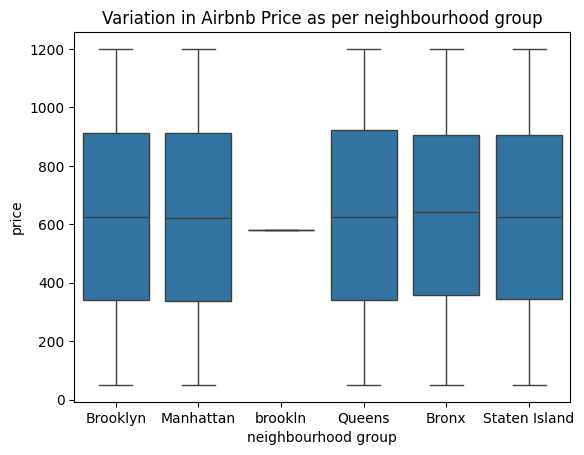

In [ ]:
# variation in Airbnb Price as per neighbourhood group
sns.boxplot(x=df['neighbourhood group'],y=df['price'])
plt.title("Variation in Airbnb Price as per neighbourhood group")
plt.show()

In [17]:
df_room_type=df.groupby(by='room type')['price'].mean().sort_values(ascending=False).reset_index()
df_room_type

,room type,price
0,Hotel room,660.238532
1,Shared room,631.753150
2,Private room,625.488680
3,Entire home/apt,625.138852


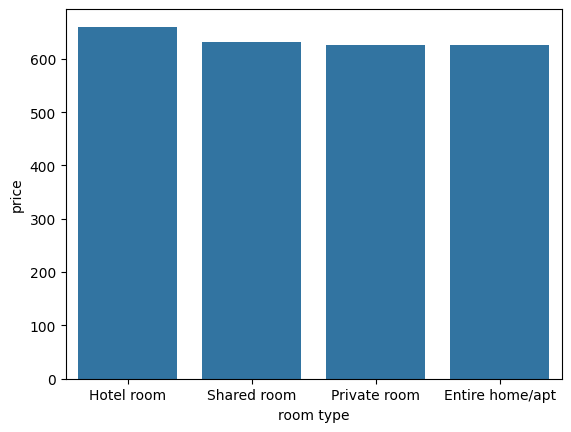

In [19]:
sns.barplot(x=df_room_type['room type'],y=df_room_type['price'])
plt.show()

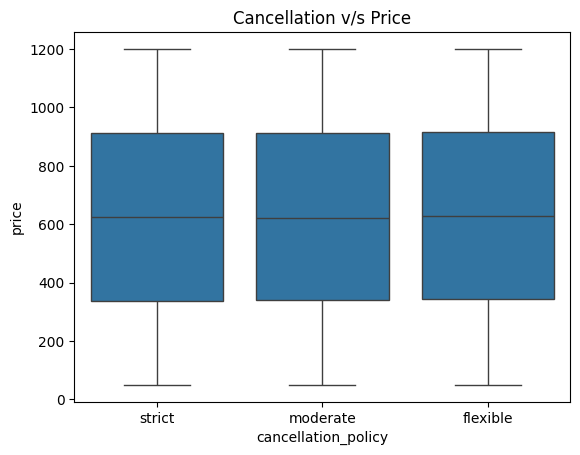

In [ ]:
# cancellation v/s price
sns.boxplot(x=df['cancellation_policy'],y=df['price'])
plt.title("Cancellation v/s Price")
plt.show()

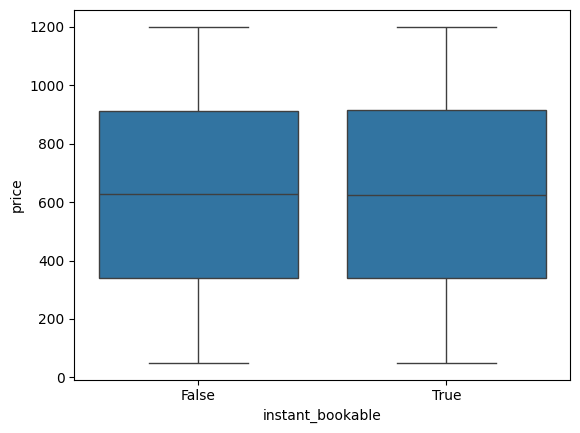

In [21]:
#instant Bookable v/s Price
sns.boxplot(x=df['instant_bookable'],y=df['price'])
plt.show()

#### 👧🏻 Host Analysis¶

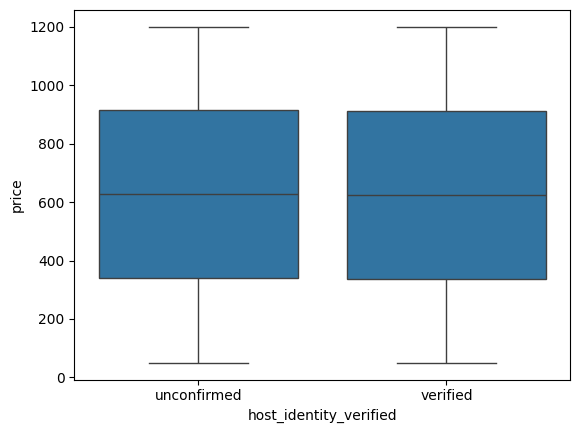

In [22]:
#Verified vs. Non-Verified Hosts: Check if verified hosts charge more or get more revie
sns.boxplot(x=df['host_identity_verified'],y=df['price'])
plt.show()

In [23]:
#Host with multiple listings
df_id_mul=df['host id'].value_counts()
df_id_mul.head(523)

host id
43513040649    2
27692673803    2
4933813763     2
46867458535    2
43227597317    2
              ..
7890725904     2
27113703924    2
34067158534    2
1454440112     2
80095623911    2
Name: count, Length: 523, dtype: int64

#### 📈Availability & Booking Trends📖

In [24]:
# Availability over a year:Indeintify propreties which are availble for larger part of the year.
df_avail=df['availability 365'].value_counts().sort_values(ascending=False).reset_index()
df_avail.head(10)

,availability 365,count
0,0.0,22853
1,365.0,2420
2,364.0,1136
3,89.0,737
4,1.0,717
5,179.0,668
6,90.0,661
7,5.0,615
8,3.0,562
9,180.0,522


In [25]:
#instant v/s Non-Instant
df_instant=df['instant_bookable'].value_counts().sort_values(ascending=False).reset_index()
df_instant

,instant_bookable,count
0,False,49762
1,True,49270


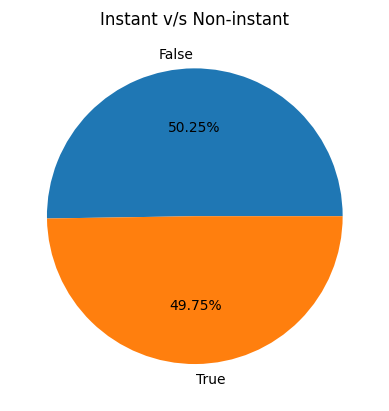

In [28]:
plt.pie(df_instant['count'],labels=df_instant['instant_bookable'],autopct='%1.2f%%')
plt.title("Instant v/s Non-instant")
plt.show()

#### 🧑‍🤝‍🧑Guest Experience & Reviews⭐⭐⭐⭐⭐

In [29]:
df_rev=df.groupby(by='room type')['number of reviews'].mean().sort_values(ascending=False).reset_index()
df_rev

,room type,number of reviews
0,Hotel room,82.146789
1,Private room,27.631473
2,Entire home/apt,27.186941
3,Shared room,20.543164


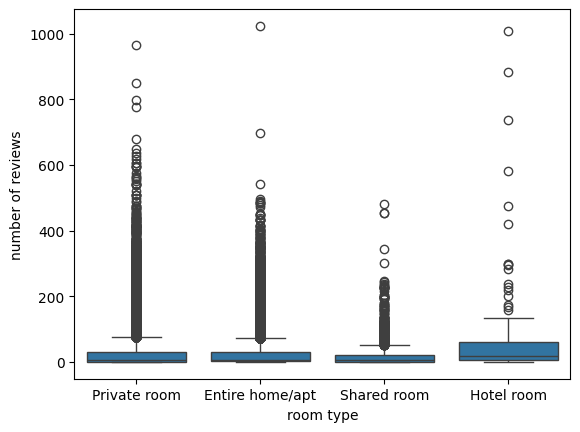

In [30]:
df_reviews=sns.boxplot(x=df['room type'],y=df['number of reviews'])

In [31]:
# Review score analysis
df_rev_score=df.groupby(by='room type')['review rate number'].mean().sort_values(ascending=False).reset_index()
df_rev_score

,room type,review rate number
0,Hotel room,3.532110
1,Shared room,3.316379
2,Private room,3.280930
3,Entire home/apt,3.275547


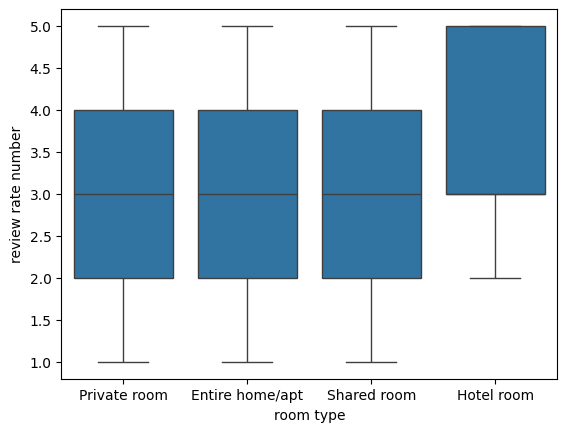

In [32]:
sns.boxplot(x=df['room type'],y=df['review rate number'])
plt.show()

#### 🌙Minimum Nights Analysis⭐⭐

In [33]:
df['minimum nights'].value_counts().reset_index()

,minimum nights,count
0,1.0,24629
1,2.0,22946
2,3.0,15616
3,30.0,11282
4,4.0,6407
...,...,...
139,-365.0,1
140,-200.0,1
141,307.0,1
142,129.0,1


#### Policy-Based Analysis📊

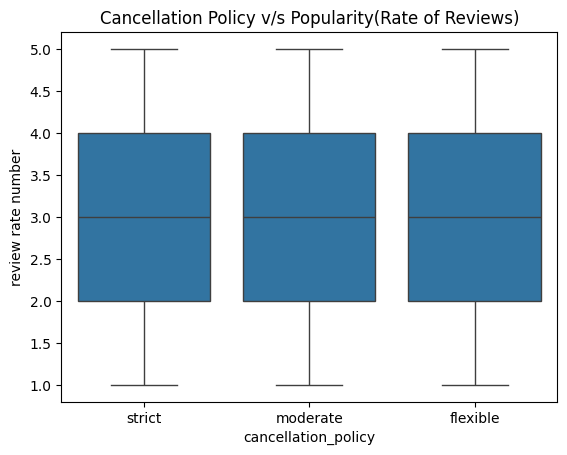

In [34]:
sns.boxplot(x=df['cancellation_policy'],y=df['review rate number'])
plt.title("Cancellation Policy v/s Popularity(Rate of Reviews)")
plt.show()

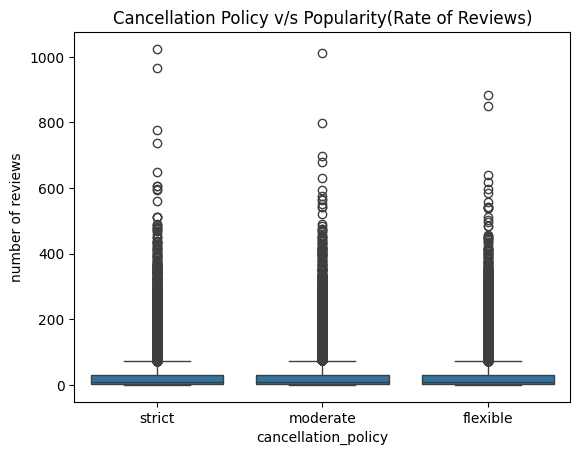

In [35]:
sns.boxplot(x=df['cancellation_policy'],y=df['number of reviews'])
plt.title("Cancellation Policy v/s Popularity(Rate of Reviews)")
plt.show()

In [36]:
#Room Type vs. Cancellation Policy
df['cancellation_policy'].value_counts()

cancellation_policy
moderate    33188
strict      32956
flexible    32888
Name: count, dtype: int64

In [37]:
df['cancellation_policy_encoded']=df['cancellation_policy'].map({'flexible':0,'moderate':1,'strict':2})
df['cancellation_policy_encoded']

0         2
1         1
4         1
5         0
7         1
         ..
102594    0
102595    1
102596    1
102597    2
102598    0
Name: cancellation_policy_encoded, Length: 99032, dtype: int64

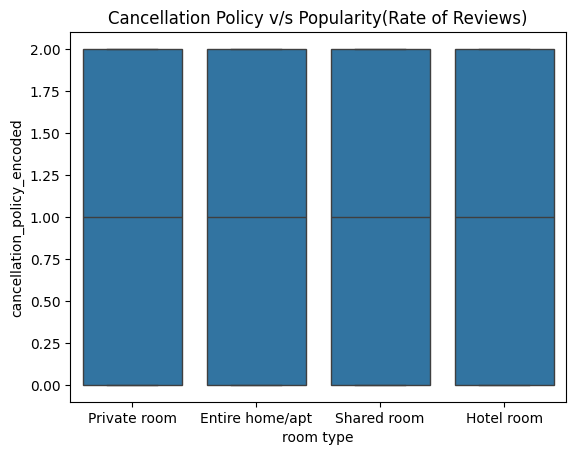

In [39]:
sns.boxplot(x=df['room type'],y=df['cancellation_policy_encoded'])
plt.title("Cancellation Policy v/s Popularity(Rate of Reviews)")
plt.show()